<img src="https://www.eurecom.fr/sites/all/themes/eurecom/images/home/EURECOM_logo_250x118.png">


<br>
<p><font size="5">  MAchine Learning and Intelligent System  </font></p>
<p><font size="5">  Gradient Descent </font></p>

<p><font size="4"> EURECOM </font></p>
<center>
<p><font size="4"> Name & SURNAME : Mokhles BOUZAIEN</font></p>
</center>
----------------------------
## <span style="color:#00B8DE"> Gradient descent algorithm</span>
In this notebook, I'll try to implement the gradient descent algorithm, test it with few predefined functions and visualize its behabiour in order to coclude with the importance of each parameter of the algorithm.

## <span style="color:#00B8DE">Reference</span>

> [Gradient algorithm on Wikipedia](http://en.wikipedia.org/wiki/Gradient_descent)

> [Gradient Descent Methods on Numerical Tours](http://www.numerical-tours.com/matlab/optim_1_gradient_descent/)

In [1]:
# Imports

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Test Funcions (inspired from https://en.wikipedia.org/wiki/Gradient_descent and http://www.numerical-tours.com/matlab/optim_1_gradient_descent/)

f = lambda x,y : (x-2)**2*(np.sin(y-1))**2+x**2+y**2
g = lambda x,y : (1-x)**2+100*(y-x**2)**2
h = lambda x,y : ( x**2 + 10*y**2 ) / 2

In [3]:
# The partial derivatives

df = lambda x,y : np.array([2*x+2*(x-2)*(np.sin(y-1))**2, 2*y+(x-2)**2*np.sin(2*(y-1))])
dg = lambda x,y : np.array([2*(200*x**3-200*x*y+x-1), 200*(y-x**2)])
dh = lambda x,y : np.array([x,10*y])

In [4]:
# Gradient descent

def grad(fun=h,                              # The function to minimize
         dfun=dh,                            # The partial derivatives
         init=np.array([1.5,1.5]),           # Starting point
         gamma=0.5,                          # Gradient step
         precision=0.01,                     # Precision
         max_iters=1000,                     # Maximum number of iterations
         xlim=(-2, 2),                       # X limits (for graphic representation)
         ylim=(-2, 2),                       # Y limits (for graphic representation)
         arrows=False,                       # Plot steps
         e=0.005):                           # Meshgrid stepsize (for graphic representation)
    
    X = np.arange(xlim[0],xlim[1], e)
    Y = np.arange(ylim[0],ylim[1], e)
    X, Y = np.meshgrid(X, Y)
    Z = fun(X, Y)
    cur_a = init
    
    fig = plt.figure(figsize=(16,8))
    # Representing the 3-D function
    ax = plt.subplot(121, projection = '3d')
    ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
    ax.contour(X, Y, Z, zdir = 'z', offset = -0.8, cmap = cm.coolwarm)
    ax.set_title('f function graph', fontsize = 15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    # Representing contours and the starting point
    ax = plt.subplot(122)
    plt.imshow(Z, extent = (xlim[0],xlim[1],ylim[0],ylim[1]), cmap=cm.coolwarm, origin = 'lower')
    plt.contour(X, Y, Z, 30)
    plt.plot(cur_a[0], cur_a[1], 'o', color='r')
    
    
    previous_step_size = 1 # To enter while loop
    iters = 0 # Iteration counter
    #print(previous_step_size > precision and iters < max_iters)
    
    while previous_step_size > precision and iters < max_iters:
        prev_a = cur_a
        cur_a = cur_a - gamma * dfun(prev_a[0], prev_a[1])
        previous_step_size = np.linalg.norm(cur_a - prev_a)
        if arrows:
            dx, dy = cur_a[0] - prev_a[0], cur_a[1] - prev_a[1]
            plt.arrow(prev_a[0], prev_a[1], dx, dy, length_includes_head=True, head_width=0.02)
        plt.plot(cur_a[0], cur_a[1], '.',color='k')
        iters += 1
    print("The final solution is ",cur_a)
    print('We obtain the solution with a '+str(precision)+' precision, after '+str(iters)+' iterations.')
    return cur_a

## <center>$f(x,y)=(x-2)^2*(sin(y-1))^2+x^2+y^2$</center> 

The final solution is  [0.09269109 0.77872974]
We obtain the solution with a 0.0001 precision, after 155 iterations.


array([0.09269109, 0.77872974])

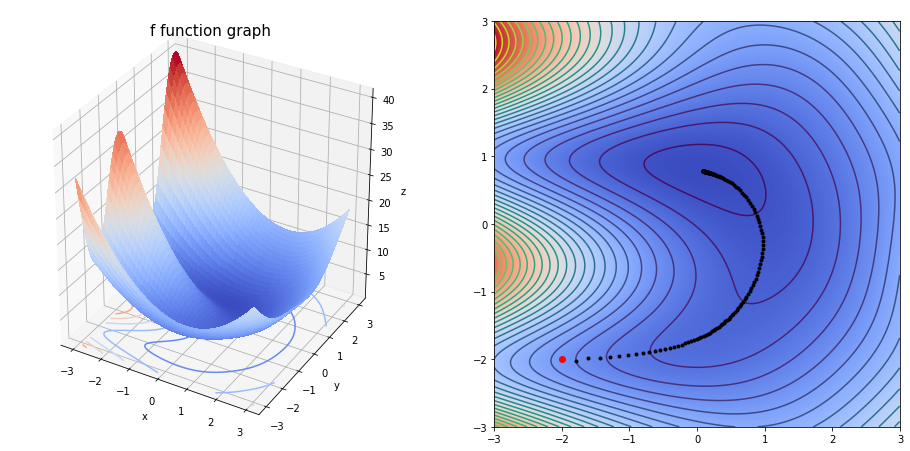

In [5]:
grad(fun=f, 
     dfun=df, 
     init=np.array([-2,-2]), 
     gamma=0.05, 
     precision=1e-04, 
     max_iters=10000, 
     xlim=(-3, 3), 
     ylim=(-3, 3))

The final solution is  [0.0918675  0.77892566]
We obtain the solution with a 0.0001 precision, after 36 iterations.


array([0.0918675 , 0.77892566])

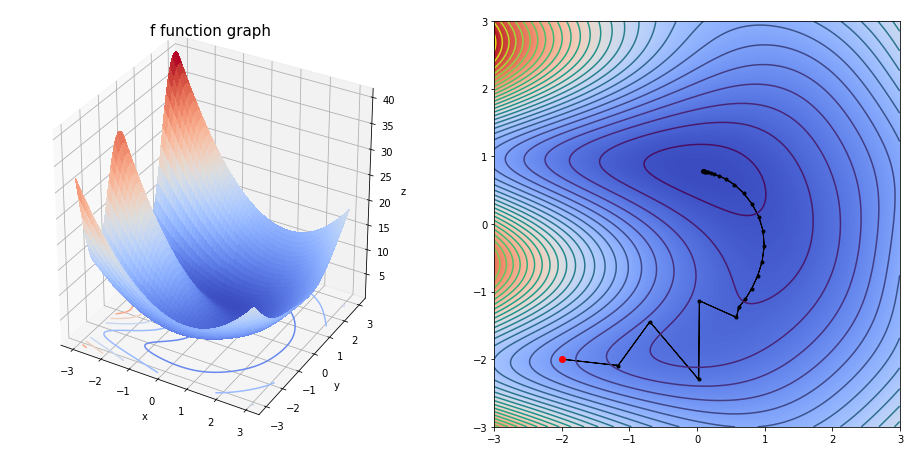

In [6]:
grad(fun=f, 
     dfun=df, 
     init=np.array([-2,-2]), 
     gamma=0.2, 
     precision=1e-04, 
     max_iters=10000, 
     xlim=(-3, 3), 
     ylim=(-3, 3), 
     arrows=True)

The final solution is  [0.07586343 0.09220978]
We obtain the solution with a 0.001 precision, after 100 iterations.


array([0.07586343, 0.09220978])

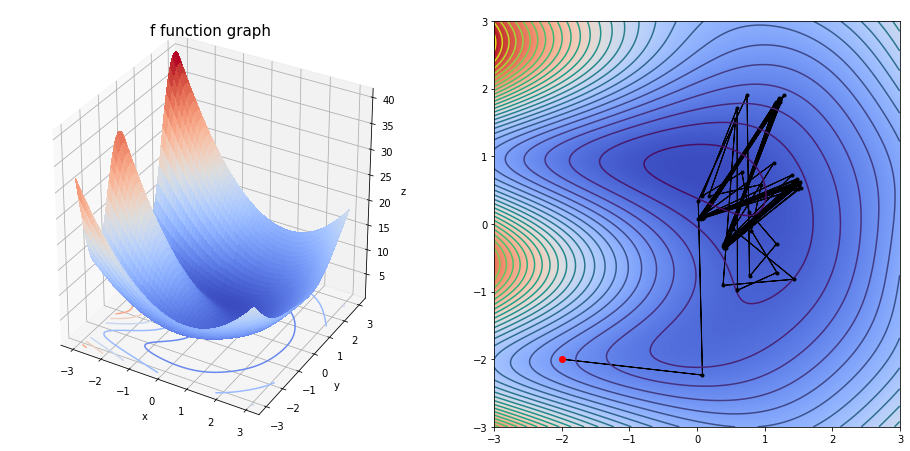

In [7]:
grad(fun=f, 
     dfun=df, 
     init=np.array([-2,-2]), 
     gamma=0.5, 
     precision=1e-03, 
     max_iters=100, 
     xlim=(-3, 3), 
     ylim=(-3, 3), 
     arrows=1)

As we can see, if we increase the step size ($\gamma$) from $0.05$ to $0.2$ we can converge to the minimum very fast ($36$ iterations instead of $155$). But after increasing the step size to $0.5$ the algorithm seems not to converge (at least after $10,000$ iterations).

## <center>$g(x,y)=(1-x)^2+100*(y-x^2)^2$</center></br>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/3/32/Rosenbrock_function.svg"></center>

The final solution is  [0.46330448 0.2853615 ]
We obtain the solution with a 0.001 precision, after 10000 iterations.


array([0.46330448, 0.2853615 ])

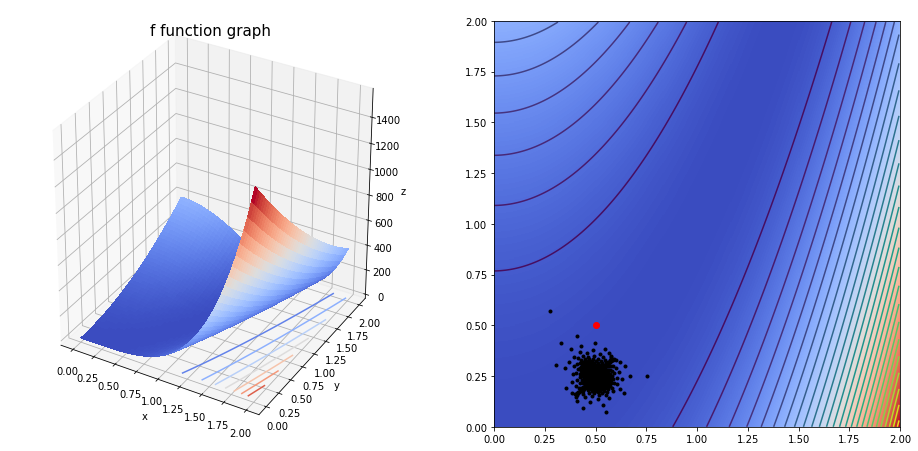

In [8]:
grad(fun=g, 
     dfun=dg, 
     init=np.array([0.5,0.5]),
     gamma=0.005, precision=1e-03, 
     max_iters=10000, 
     xlim=(0, 2), 
     ylim=(0, 2))

The final solution is  [1.01127616 1.02272428]
We obtain the solution with a 1e-05 precision, after 8019 iterations.


array([1.01127616, 1.02272428])

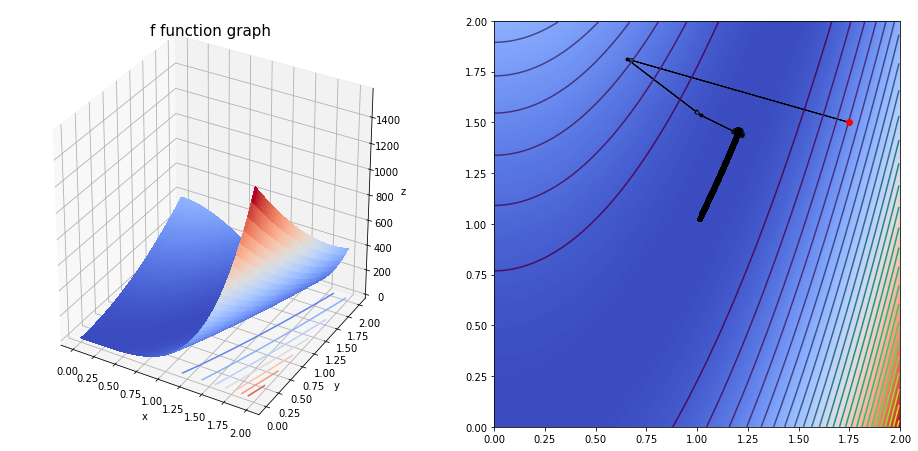

In [9]:
grad(fun=g, 
     dfun=dg, 
     init=np.array([1.75,1.5]), 
     gamma=0.001, 
     precision=1e-05, 
     max_iters=10000, 
     xlim=(0, 2), 
     ylim=(0, 2), 
     arrows=1)

The final solution is  [0.98892335 0.97792476]
We obtain the solution with a 1e-05 precision, after 7166 iterations.


array([0.98892335, 0.97792476])

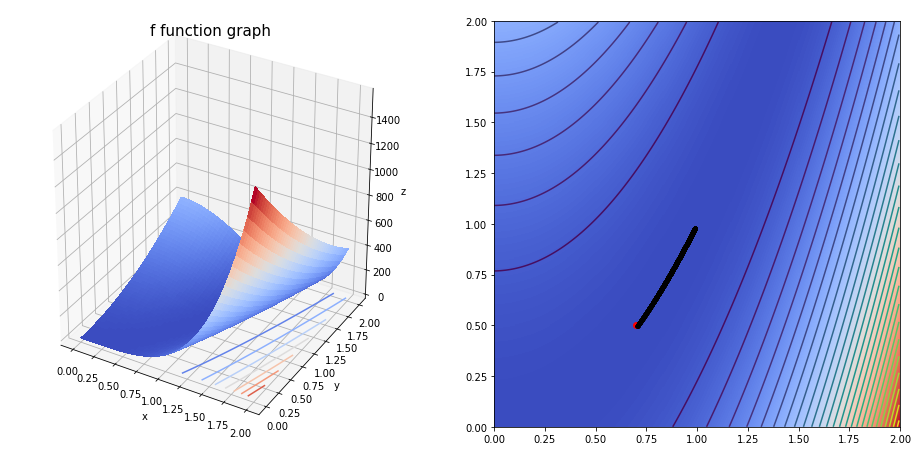

In [10]:
grad(fun=g,
     dfun=dg,
     init=np.array([0.7,0.5]),
     gamma=0.001, 
     precision=1e-05,
     max_iters=50000, 
     xlim=(0, 2), 
     ylim=(0, 2))

TL;DR The starting point is important to get a convergent algorithm.

## <center>$h(x,y)=0.5*( x^2 + 10*y^2 )$</center> 

The final solution is  [1.82104767e-02 1.93870456e-26]
We obtain the solution with a 0.001 precision, after 86 iterations.


array([1.82104767e-02, 1.93870456e-26])

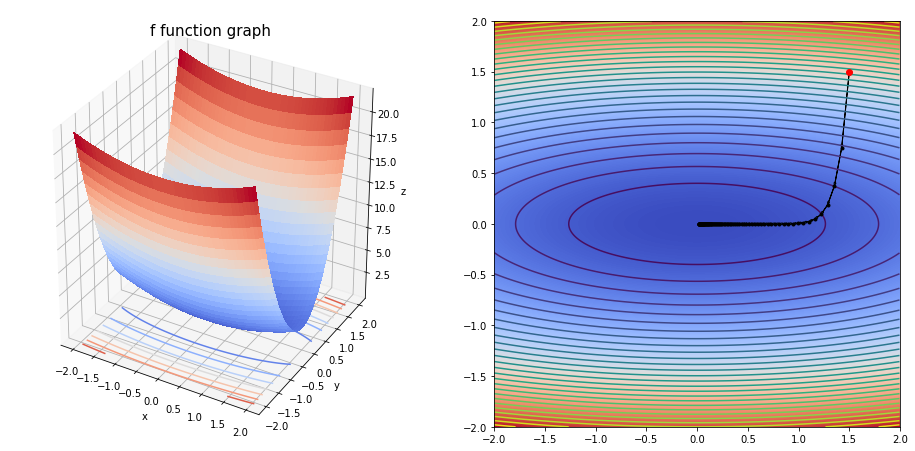

In [11]:
grad(fun=h, 
     dfun=dh, 
     init=np.array([1.5,1.5]), 
     gamma=0.05, 
     precision=1e-03,
     max_iters=10000, 
     xlim=(-2, 2), 
     ylim=(-2, 2), 
     arrows=1)

The final solution is  [1.16067141 0.046875  ]
We obtain the solution with a 0.1 precision, after 5 iterations.


array([1.16067141, 0.046875  ])

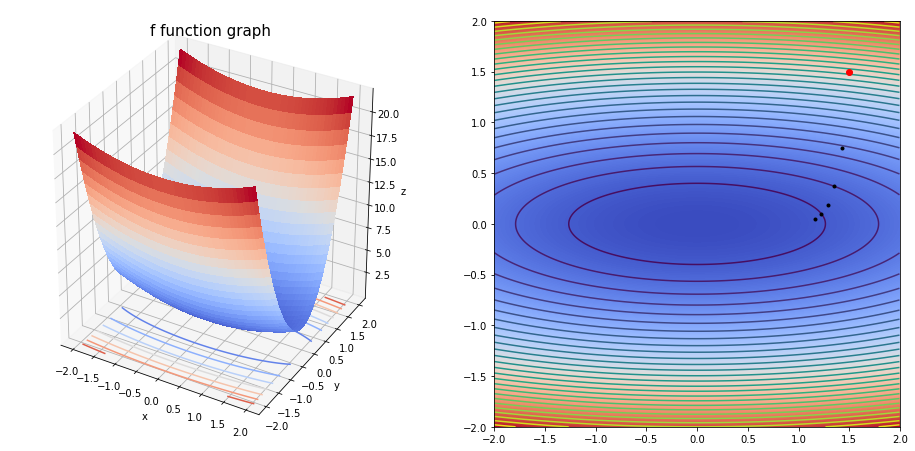

In [12]:
grad(fun=h, dfun=dh, init=np.array([1.5,1.5]), gamma=0.05, precision=1e-01, max_iters=10000, xlim=(-2, 2), ylim=(-2, 2))

Not enough iterations since fastly we reached a point where $||a_{n+1}-a_n||=||-\gamma\nabla h(a_n)||<precision=0.1$.

# Gradient Descent Algorithm applied to Least Squares Method

The least squares method consists of minimizing the Mean Squared Error function defined as :
$MSE(w_0,w_1)=\frac{1}{N}\sum_{i=1}^{N}{(f(x_i)-y_i)^2}=\frac{1}{N}\sum_{i=1}^{N}{(w_0+w_1x_i-y_i)^2}$

In [13]:
from sklearn.datasets import make_regression

In [14]:
N = 100 # Sample size

In [15]:
# Generating dataset
X, y = make_regression(N, 1, noise=50)
X = np.array([k[0] for k in X])

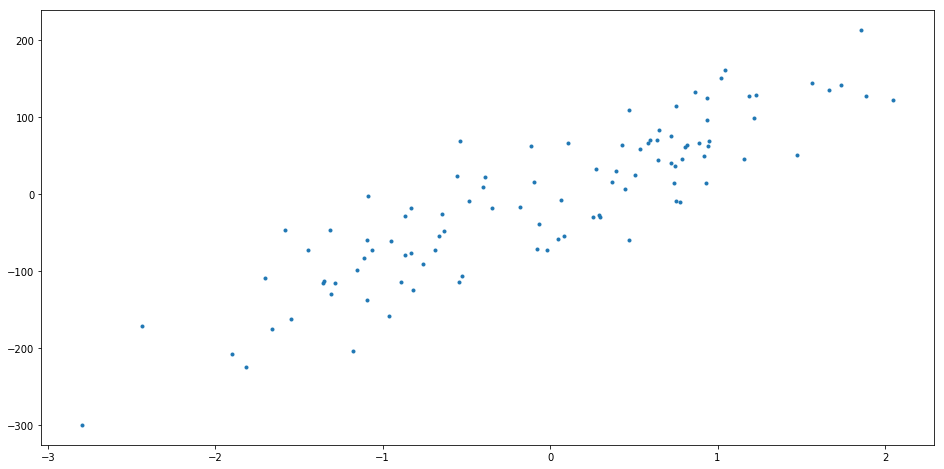

In [16]:
fig = plt.figure(figsize=(16,8))
plt.scatter(X,y,marker='.')
plt.show()

In [17]:
mse = lambda w0,w1 : (1/N)*np.square(sum(w0+w1*X[i]-y[i] for i in range(N)))

In [18]:
dmse = lambda w0,w1 : np.array([2*w0+(2*w1/N)*sum(X)-(2/N)*sum(y), 
                               (2/N)*sum(X[i]*(w0+w1*X[i]-y[i]) for i in range(N))])

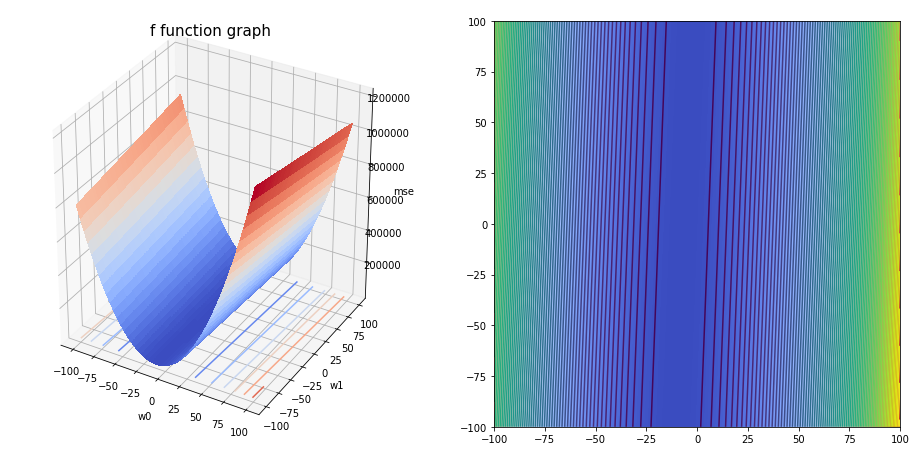

In [19]:
Xr = np.arange(-100,100, 0.1)
Yr = np.arange(-100,100, 0.1)
Xr, Yr = np.meshgrid(Xr, Yr)
Zr = mse(Xr, Yr)

fig_1 = plt.figure(figsize=(16,8))
ax = plt.subplot(121, projection = '3d')
ax.plot_surface(Xr, Yr, Zr, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
ax.contour(Xr, Yr, Zr, zdir = 'z', offset = 0, cmap = cm.coolwarm)
ax.set_title('f function graph', fontsize = 15)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('mse')

ax = plt.subplot(122)
plt.imshow(Zr, extent = (-100,100,-100,100), cmap=cm.coolwarm, origin = 'lower')
plt.contour(Xr, Yr, Zr, 100)

The final solution is  [-3.57291527 82.93018126]
We obtain the solution with a 1e-05 precision, after 131 iterations.


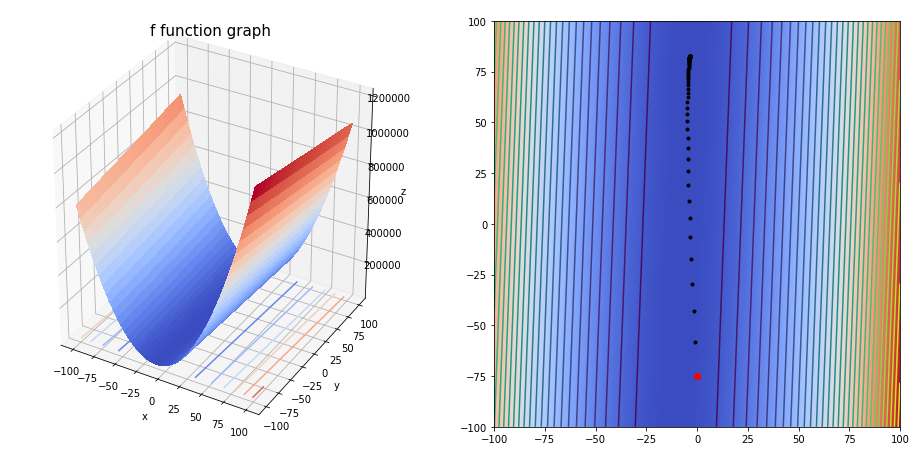

In [20]:
w0,w1 = grad(fun=mse, 
             dfun=dmse,
             init=np.array([0,-75]),
             gamma=0.05,
             precision=1e-05, 
             max_iters=10000, 
             xlim=(-100, 100), 
             ylim=(-100, 100),
             e=0.1)

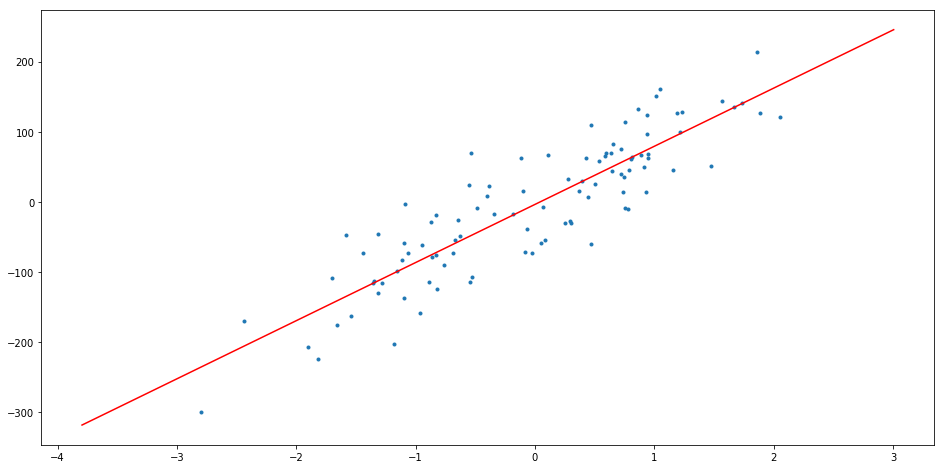

In [21]:
fig_1 = plt.figure(figsize=(16,8))
xrange = np.arange(min(X)-1, max(X)+1, 0.1)
plt.plot(xrange, w0+w1*xrange, color='r')
plt.scatter(X,y,marker='.')
plt.show()